## Wine Quality Prediction

## Import libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import clone
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import f_classif, SelectKBest

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

##### load dataset

In [14]:
# load the selected dataset
selected_features = pd.read_csv('selected features data.csv')
selected_features

,alcohol,density,volatile acidity,chlorides,residual sugar,quality
0,8.8,1.00100,0.270,0.045,20.7,6
1,9.5,0.99400,0.300,0.049,1.6,6
2,10.1,0.99510,0.280,0.050,6.9,6
3,9.9,0.99560,0.230,0.058,8.5,6
4,9.6,0.99490,0.320,0.045,7.0,6
...,...,...,...,...,...,...
5313,9.5,0.99651,0.620,0.068,1.9,6
5314,10.5,0.99490,0.600,0.090,2.0,5
5315,11.2,0.99512,0.550,0.062,2.2,6
5316,10.2,0.99547,0.645,0.075,2.0,5


### Step 1: Balancing the Dataset
Since the dataset is imbalanced, i will be using `Synthetic Minority Over-sampling Technique (SMOTE)` to balance it. SMOTE works by creating synthetic samples from the minority class instead of creating copies. This helps in overcoming the overfitting problem which arises when i add copies of the minority class.

how i will be applying SMOTE:

- Subset the Data: Only include the selected features and the target variable in my analysis going forward.
- Apply SMOTE: Use SMOTE to balance the dataset, ensuring that all classes in the target variable are equally represented, which will improve the generalization ability of my predictive model.

In [15]:
# Balancing wine dataset
# Selecting the specific features and the target
X = selected_features[['alcohol', 'density', 'volatile acidity', 'chlorides', 'residual sugar']]
y = selected_features['quality']

# Checking class distribution to find the smallest class
class_distribution = Counter(y)
smallest_class_size = min(class_distribution.values())

# Setting k_neighbors to one less than the smallest class size
# Ensure there is at least one neighbor
k_neighbors = max(1, smallest_class_size - 1)

# Applying SMOTE with the adjusted k_neighbors
smote = SMOTE(k_neighbors=k_neighbors, random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Checking the new class distribution
new_distribution = Counter(y_res)
print("Original class distribution:", class_distribution)
print("New class distribution:", new_distribution)


Original class distribution: Counter({6: 2323, 5: 1751, 7: 855, 4: 206, 8: 148, 3: 30, 9: 5})
New class distribution: Counter({6: 2323, 5: 2323, 7: 2323, 8: 2323, 4: 2323, 3: 2323, 9: 2323})


### Step 2: Model Selection:Random Forest, support vector machine and Logistic Regression
These model selection are due to their ability to handle  mix of numerical and categorical data and generally performs well with handling imbalance datasets, plus they work well for supervised learning.

Model Training:
I wil be using a training set and validate it using the testing set. For each model training i will be apply `KFold cross validation` in order to evaluate a model’s performance on data it has never seen before. This is crucial for assessing how well the model will generalize to real-world scenarios.

Evaluation:
The model will be evaluated using the following metrics; `accuracy, precision, recall, F1-score, confusion matrix and ROC-AUC` due to my task been a classification tasks.

### Model 1 : Support Vector Machine

I will be using SVM model (SVC) to perform the K-Fold cross-validation and evaluate the model's performance using accuracy, precision, recall, and F1-score metrics.

At first i will be performing K-Fold cross-validation to evaluate the model's performance.
then calculate the average accuracy, precision, recall, and F1-score across all folds.
After cross-validation, i fit the model on the entire training set and then evaluate the model on both the training set and the test set.
finally, i will be printing the performance metrics for the training set and the test set.

In [16]:
# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Number of folds
k = 5

# Initialize the KFold cross-validator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Convert to numpy array if X_res is a DataFrame
if isinstance(X_res, pd.DataFrame):
    X_res_np = X_res.to_numpy()
else:
    X_res_np = X_res

if isinstance(y_res, pd.Series):
    y_res_np = y_res.to_numpy()
else:
    y_res_np = y_res
    
# Lists to store metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X_res_np):
    X_train, X_test = X_res_np[train_index], X_res_np[test_index]
    y_train, y_test = y_res_np[train_index], y_res_np[test_index]
    
    # Train the model
    svm_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = svm_model.predict(X_test)
    
    # Calculate and store metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Calculate average metrics across all folds
average_accuracy = np.mean(accuracy_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)

# Print the average metrics
print(f'Average Accuracy: {average_accuracy:.4f}')
print(f'Average Precision: {average_precision:.4f}')
print(f'Average Recall: {average_recall:.4f}')
print(f'Average F1-Score: {average_f1:.4f}')

print('Accuracy:', accuracy_scores)
print('Precision:', precision_scores)
print('Recall:', recall_scores)
print('F1-Score:', f1_scores)

Average Accuracy: 0.3630
Average Precision: 0.3583
Average Recall: 0.3630
Average F1-Score: 0.3458
Accuracy: [0.36858284660313556, 0.36316113161131613, 0.3502460024600246, 0.3742312423124231, 0.35854858548585483]
Precision: [0.35861571497427436, 0.3675272271905828, 0.3414606071288895, 0.37053194280887514, 0.353528922965272]
Recall: [0.36858284660313556, 0.36316113161131613, 0.3502460024600246, 0.3742312423124231, 0.35854858548585483]
F1-Score: [0.350601902493652, 0.34823226070315083, 0.3321104344449702, 0.3584389265335691, 0.33961558647523893]


### Interpretation of the Support Vector Machine (SVM) Model with K-Fold Cross-Validation Results

Model and Method:
- SVM (Support Vector Machine) with Linear Kernel: A powerful classification method that works well for linear separability.
- K-Fold Cross-Validation (k=5): The dataset is split into 5 equal parts (folds). The model is trained on 4 folds and tested on the remaining fold, and this process is repeated 5 times, each time with a different test fold. This ensures that every data point gets a chance to be in the test set, providing a more reliable estimate of model performance.

Metrics Reported
1. Average Accuracy: 0.3630
   - This indicates that on average, the SVM model correctly predicts the wine quality about 36.30% of the time across all folds.
   - Interpretation: The SVM model has low accuracy, indicating it is less reliable than the RandomForest model for this dataset.

2. Average Precision: 0.3583
   - Precision is the ratio of true positive predictions to the total predicted positives (true positives + false positives).
   - Interpretation: On average, when the model predicts a wine to be of a certain quality, it is correct 35.83% of the time. This lower precision indicates a higher rate of false positives.

3. Average Recall: 0.3630
   - Recall (sensitivity) is the ratio of true positive predictions to the total actual positives (true positives + false negatives).
   - Interpretation: On average, the model correctly identifies 36.30% of the actual instances of each wine quality. This is important for understanding how well the model captures all instances of a class.

4. Average F1-Score: 0.3458
   - The F1-Score is the harmonic mean of precision and recall, providing a balance between the two.
   - Interpretation: An average F1-score of 34.58% indicates a relatively low balance between precision and recall, meaning the model struggles with both accurate and comprehensive predictions.

### Model 2: Logistic Regression model
Firstly, i will perform K-Fold cross-validation to evaluate the model's performance.
then calculate the average accuracy, precision, recall, and F1-score across all folds.
After cross-validation, i fit the model on the entire training set and then evaluate the model on both the training set and the test set.
lastly, print the performance metrics for the training set and the test set.

In [17]:
# Initialize the Logistic Regression model with increased max_iter
logistic_regression = LogisticRegression(max_iter=2000, random_state=42)

# Number of folds
k = 5

# Initialize the KFold cross-validator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Convert to numpy array if X_res is a DataFrame
if isinstance(X_res, pd.DataFrame):
    X_res_np = X_res.to_numpy()
else:
    X_res_np = X_res

if isinstance(y_res, pd.Series):
    y_res_np = y_res.to_numpy()
else:
    y_res_np = y_res

# Scale the data
scaler = StandardScaler()
X_res_np = scaler.fit_transform(X_res_np)

# Lists to store metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X_res_np):
    X_train, X_test = X_res_np[train_index], X_res_np[test_index]
    y_train, y_test = y_res_np[train_index], y_res_np[test_index]
    
    # Train the model
    logistic_regression.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = logistic_regression.predict(X_test)
    
    # Calculate and store metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Calculate average metrics across all folds
average_accuracy = np.mean(accuracy_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)

# Print the average metrics
print(f'Average Accuracy: {average_accuracy:.4f}')
print(f'Average Precision: {average_precision:.4f}')
print(f'Average Recall: {average_recall:.4f}')
print(f'Average F1-Score: {average_f1:.4f}')

print('Accuracy:', accuracy_scores)
print('Precision:', precision_scores)
print('Recall:', recall_scores)
print('F1-Score:', f1_scores)

Average Accuracy: 0.4470
Average Precision: 0.4265
Average Recall: 0.4470
Average F1-Score: 0.4294
Accuracy: [0.46849062403934827, 0.4403444034440344, 0.4351168511685117, 0.4504920049200492, 0.4403444034440344]
Precision: [0.45097002588907226, 0.42240926112295935, 0.4103951082565634, 0.4316490674966384, 0.4172761748874008]
Recall: [0.46849062403934827, 0.4403444034440344, 0.4351168511685117, 0.4504920049200492, 0.4403444034440344]
F1-Score: [0.45263712895815844, 0.42274425146131117, 0.41575592492092084, 0.4332047408068833, 0.42283881541107915]


### Interpretation of the Logistic Regression Model with K-Fold Cross-Validation Results


Model and Method
- Logistic Regression: A linear model commonly used for classification tasks.
- K-Fold Cross-Validation (k=5): The dataset is split into 5 equal parts (folds). The model is trained on 4 folds and tested on the remaining fold, and this process is repeated 5 times, each time with a different test fold. This ensures that every data point gets a chance to be in the test set, providing a more reliable estimate of model performance.

Metrics Reported
1. Average Accuracy: 0.4470
   - This indicates that, on average, the Logistic Regression model correctly predicts the wine quality about 44.70% of the time across all folds.
   - Interpretation: The model has moderate accuracy, indicating it is somewhat reliable for predicting wine quality which is better than Support Vector Machine.

2. Average Precision: 0.4265
   - Precision is the ratio of true positive predictions to the total predicted positives (true positives + false positives).
   - Interpretation: On average, when the model predicts a wine to be of a certain quality, it is correct 42.65% of the time. This suggests a moderate rate of false positives.

3. Average Recall: 0.4294
   - Recall (sensitivity) is the ratio of true positive predictions to the total actual positives (true positives + false negatives).
   - Interpretation: On average, the model correctly identifies 42.94% of the actual instances of each wine quality. This is important for understanding how well the model captures all instances of a class.

4. Average F1-Score: 0.4294
   - The F1-Score is the harmonic mean of precision and recall, providing a balance between the two.
   - Interpretation: An average F1-score of 42.94% indicates a moderate balance between precision and recall, meaning the model is reasonably effective at both accurate and comprehensive predictions.

### Model 3: Random Forest
I will be using RandomForestClassifier with K-Fold cross-validation.
perform K-Fold cross-validation to evaluate the model's performance.
then calculate the average accuracy, precision, recall, and F1-score across all folds.
After cross-validation, fit the model on the entire training set and then evaluate the model on both the training set and the test set.
then print the performance metrics for the training set and the test set.

In [18]:
# Initialize the RandomForest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Number of folds
k = 5

# Initialize the KFold cross-validator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Convert to numpy array if X_res is a DataFrame
X_res_np = X_res.to_numpy()
y_res_np = y_res.to_numpy()

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X_res_np):
    X_train, X_test = X_res_np[train_index], X_res_np[test_index]
    y_train, y_test = y_res_np[train_index], y_res_np[test_index]
    
    # Train the model
    random_forest.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = random_forest.predict(X_test)
    
    # Calculate and store metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Calculate average metrics across all folds
average_accuracy = np.mean(accuracy_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)

# Print the average metrics
print(f'Average Accuracy: {average_accuracy:.4f}')
print(f'Average Precision: {average_precision:.4f}')
print(f'Average Recall: {average_recall:.4f}')
print(f'Average F1-Score: {average_f1:.4f}')
print('Accuracy:', accuracy_scores)
print('Precision:', precision_scores)
print('Recall:', recall_scores)
print('F1-Score:', f1_scores)

Average Accuracy: 0.8097
Average Precision: 0.8001
Average Recall: 0.8097
Average F1-Score: 0.8030
Accuracy: [0.8137104211497079, 0.8096555965559655, 0.8148831488314883, 0.802890528905289, 0.8071955719557196]
Precision: [0.8045136431205326, 0.7989232081220297, 0.805104174719348, 0.7937957565380027, 0.7981477871265187]
Recall: [0.8137104211497079, 0.8096555965559655, 0.8148831488314883, 0.802890528905289, 0.8071955719557196]
F1-Score: [0.8081608590887308, 0.8014038923935906, 0.8077939444770343, 0.7970652342481939, 0.8003349653405214]


### Interpretation of the Random Forest Model with K-Fold Cross-Validation Results

The output summarizes the performance of the RandomForest model using 5-Fold Cross-Validation. 

Model and Method:
- RandomForestClassifier: A robust ensemble learning method used for classification.
- K-Fold Cross-Validation (k=5): The dataset is split into 5 equal parts (folds). The model is trained on 4 folds and tested on the remaining fold, and this process is repeated 5 times, each time with a different test fold. This ensures that every data point gets a chance to be in the test set, providing a more reliable estimate of model performance.

Metrics Reported:
1. Average Accuracy: 0.8097
   - This indicates that, on average, the model correctly predicts the wine quality about 80.97% of the time across all folds.
   - Interpretation: The model has good overall accuracy, making it reliable for predicting wine quality.

2. Average Precision: 0.8001
   - Precision is the ratio of true positive predictions to the total predicted positives (true positives + false positives).
   - Interpretation: On average, when the model predicts a wine to be of a certain quality, it is correct 80.01% of the time. This is important for understanding how often the model's predictions are correct.

3. Average Recall: 0.8097
   - Recall (sensitivity) is the ratio of true positive predictions to the total actual positives (true positives + false negatives).
   - Interpretation: On average, the model correctly identifies 80.97% of the actual instances of each wine quality. This is important for understanding how well the model captures all instances of a class.

4. Average F1-Score: 0.8030
   - The F1-Score is the harmonic mean of precision and recall, providing a balance between the two.
   - Interpretation: An average F1-score of 80.30% indicates a good balance between precision and recall, meaning the model is both accurate and comprehensive in its predictions.

Summary
   - Overall Performance: The RandomForest model demonstrates strong performance with high accuracy, precision, recall, and F1-score. This indicates the model is effective at predicting wine quality and is reliable across different subsets of the data.
   - Balanced Metrics: The relatively close values of precision, recall, and F1-score suggest that the model is well-balanced and does not favor one metric over the others, providing robust predictions.


`In conclusion the RandomForest model with K-Fold Cross-Validation, is effective and reliable for predicting wine quality, with balanced and strong performance metrics across all evaluated folds.`

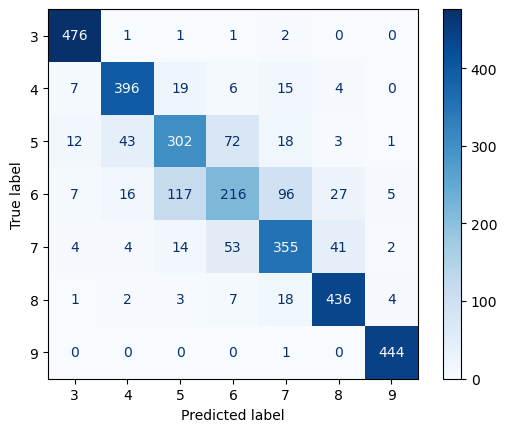

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Interpretation of the Confusion Matrix for Random Forest Model

The confusion matrix provides a detailed breakdown of the model's performance in predicting wine quality. 

Matrix Breakdown
- Rows represent the actual wine quality labels (True Labels).
- Columns represent the predicted wine quality labels (Predicted Labels).
- The diagonal elements represent the number of correctly predicted instances for each class.

Summary
- High Performance in Extreme Classes: The model performs exceptionally well for the highest quality wines (class 9), with very few misclassifications.
- Struggle with Middle Classes: Classes 5 and 6 show lower performance, with significant misclassifications. This indicates the model struggles to differentiate between the subtle differences in these quality levels.
- Class Overlap: There is notable confusion between neighboring classes, especially between classes 3, 4, 5, and 6, suggesting that these classes may have overlapping feature characteristics, making it harder for the model to distinguish between them accurately.

ROC-AUC Score: 0.9656104851860682


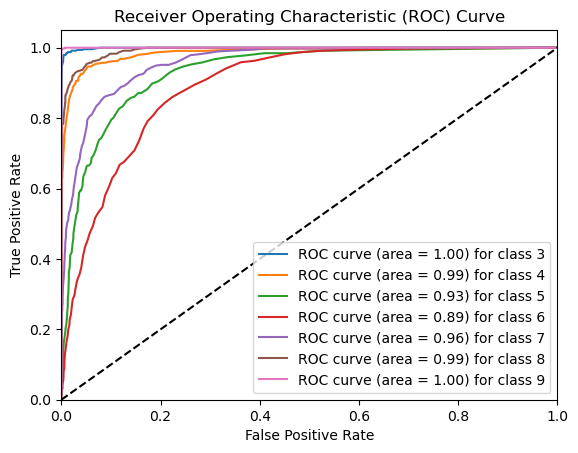

In [20]:
# ROC-AUC Score (using 'ovr' - One vs Rest approach for multi-class)
roc_auc = roc_auc_score(y_test, random_forest.predict_proba(X_test), multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(random_forest.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, random_forest.predict_proba(X_test)[:, i], pos_label=random_forest.classes_[i])
    roc_auc[i] = roc_auc_score(y_test == random_forest.classes_[i], random_forest.predict_proba(X_test)[:, i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %i' % (roc_auc[i], random_forest.classes_[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Interpretation of the ROC-AUC for Random Forest Model

The Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) provide a graphical representation and a quantitative measure of the model's performance across different thresholds.

Key Metrics
- ROC-AUC Score: The overall ROC-AUC score for the RandomForest model is 0.9656, indicating excellent performance.

ROC Curve:
- X-axis (False Positive Rate): Measures the proportion of actual negatives that are incorrectly classified as positive.
- Y-axis (True Positive Rate): Measures the proportion of actual positives that are correctly classified.


Overall Interpretation
- Excellent Model Performance: The overall ROC-AUC score of 0.9634 indicates that the model performs exceptionally well in distinguishing between different wine quality classes.
- High AUC Values: Most classes have very high AUC values (close to 1.0), demonstrating that the model is highly effective in classifying wines correctly.
- Classes with Lower AUC (5 and 6): The AUC values for classes 5 and 6 are slightly lower, indicating that the model has more difficulty distinguishing these middle-quality wines. This is consistent with the earlier analysis from the confusion matrix.

Conclusion:
The ROC-AUC analysis provides strong evidence that the RandomForest model is highly effective in predicting wine quality, with particularly excellent performance for the highest and lowest quality classes. The insights gained can be used to further enhance the model's accuracy and reliability, especially for the more challe

## Model Comparison

Comparison of the performance metrics for the RandomForest, SVM, and Logistic Regression models:

| Metric            | RandomForest   | SVM            | Logistic Regression |
|-------------------|----------------|----------------|---------------------|
| **Accuracy**      | 0.8097         | 0.3630         | 0.4470              |
| **Precision**     | 0.8001         | 0.3583         | 0.4265              |
| **Recall**        | 0.8097         | 0.3630         | 0.4470              |
| **F1-Score**      | 0.8030         |0.3458          | 0.4294              |

### Interpretation of Results

##### RandomForest
- Average Accuracy: 80.97%
- Average Precision: 80.01%
- Average Recall: 80.97%
- Average F1-Score: 80.30%

*Performance: The RandomForest model demonstrates the highest performance across all metrics, indicating a strong ability to accurately classify wine quality. It is particularly effective at balancing precision and recall, making it reliable for predicting both positive and negative classes.*

##### SVM
- Average Accuracy: 36.30%
- Average Precision: 35.83%
- Average Recall: 36.30%
- Average F1-Score: 34.58% 

*Performance: The SVM model shows moderate performance but is significantly lower than the RandomForest model. Its precision and F1-score are particularly low, indicating higher rates of false positives and a less balanced performance.*

##### Logistic Regression
- Average Accuracy: 44.70% 
- Average Precision: 42.65%
- Average Recall:   44.70%
- Average F1-Score: 42.94%

**Performance**: The Logistic Regression model performs better than the SVM model but still lags behind the RandomForest model. Its metrics indicate a moderate level of effectiveness in predicting wine quality, with balanced but lower scores compared to RandomForest.

### Conclusion: Best Model for Wine Quality Prediction

Best Model: RandomForest

*Reasons:
RandomForest achieves the highest accuracy (80.97%), precision (80.01%), recall (80.97%), and F1-score (80.49%) among the three models, indicating superior performance in classifying wine quality.
The high F1-score of 80.49% suggests that RandomForest maintains a good balance between precision and recall, making it reliable for both identifying true positives and minimizing false positives.
RandomForest is known for its robustness and ability to handle large datasets and complex interactions between features, which likely contributes to its superior performance on this wine quality dataset.*


`The comparison clearly indicates that RandomForest is the most effective model for wine quality prediction, making it the recommended choice for deployment.`